# Metagenomic-based Diagnostic for Sepsis (Karius | Drop Confirmed Features)

We asked if we could discriminate sepsis without "confirmed" (i.e. culture-positive) pathogens. The ability to do so using a stringently decontaminated feature space would provide evidence for a polymicrobial theory of sepsis.

In [1]:
# Import Statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

cwd = Path.cwd()
datasets = cwd / 'datasets'
results = cwd / 'results/drop_confirmed_features'

## Data Preprocessing
Since we are using stratified kfold, a validation split is not necesssary.

### Load data

In [2]:
raw_df = pd.read_csv(datasets / 'karius_genus_raw_maxi.csv')
display(raw_df)

X = raw_df.iloc[:, 2:].copy()
y = raw_df.iloc[:, 1].copy()

,pathogen,y,Streptococcus,Lactococcus,Lactobacillus,Enterococcus,Granulicatella,Staphylococcus,Gemella,Bacillus,...,Chitinophaga,Zhongshania,Aliagarivorans,Geomicrobium,Phytophthora,Rhodopirellula,Epibacterium,Anaerolinea,Jonquetella,Apibacter
0,none,healthy,8.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,none,healthy,2.0,0.0,0.0,1.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,none,healthy,3.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,none,healthy,7.0,0.0,1.0,0.0,0.0,10.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,none,healthy,11.0,0.0,0.0,0.0,0.0,22.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,Escherichia coli,septic,21.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
283,Cryptococcus neoformans,septic,18.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
284,Streptococcus oralis,septic,1038.0,0.0,2.0,1.0,0.0,8.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
285,Escherichia coli,septic,2.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# Get features of "causal/confirmed pathogens"
pathogens = raw_df.pathogen
pathogens = pathogens.str.strip().str.split(' ', expand=True)[0].unique()
pathogens = pathogens[pathogens != 'Human']  # Human herpesvirus

# If no fungi
pathogens = pathogens[pathogens != 'none']
pathogens = np.append(pathogens, ['Lymphocryptovirus', 'Simplexvirus'])

display(pathogens)

# Feature space with only these features
X_only = X[pathogens].copy()

# Drop these features from feature space
X = X.drop(pathogens, axis=1)

array(['Escherichia', 'Streptococcus', 'Mycobacterium', 'Cytomegalovirus',
       'Staphylococcus', 'Proteus', 'Klebsiella', 'Pseudomonas',
       'Moraxella', 'Enterococcus', 'Enterobacter', 'Citrobacter',
       'Haemophilus', 'Fusobacterium', 'Candida', 'Salmonella',
       'Serratia', 'Aerococcus', 'Campylobacter', 'Cryptococcus',
       'Lymphocryptovirus', 'Simplexvirus'], dtype=object)

In [4]:
# Drop features from simple decontam feature space
decontaminated_pathogens = pd.read_csv(datasets / 'simple_decontam_pathogens.csv', header=None)[0]
to_keep = list(set(decontaminated_pathogens) - set(pathogens))
X_simple = X.loc[:, to_keep].copy()
print(X_simple.columns)

Index(['Bacillus', 'Ochrobactrum', 'Dietzia', 'Porphyromonas', 'Tyzzerella',
       'Collinsella', 'Bacteroides', 'Parabacteroides', 'Gemella',
       'Amycolatopsis', 'Prevotella', 'Bordetella', 'Helicobacter',
       'Williamsia', 'Paenibacillus', 'Leptotrichia', 'Comamonas',
       'Paracoccus', 'Aureimonas', 'Stenotrophomonas', 'Leclercia',
       'Weissella', 'Pandoraea', 'Pseudonocardia', 'Nocardiopsis', 'Pantoea',
       'Actinomadura', 'Leifsonia', 'Providencia', 'Neisseria',
       'Granulicatella', 'Azospirillum', 'Curtobacterium', 'Actinomyces',
       'Psychrobacter', 'Rhodococcus', 'Clostridium', 'Cupriavidus',
       'Exiguobacterium', 'Janibacter', 'Eikenella', 'Agrobacterium',
       'Bifidobacterium', 'Lactobacillus', 'Vibrio', 'Lactococcus',
       'Alistipes', 'Legionella', 'Burkholderia', 'Roseomonas', 'Rothia',
       'Kocuria', 'Aeromonas', 'Shewanella', 'Capnocytophaga',
       'Cellulosimicrobium', 'Cellulomonas', 'Yersinia', 'Oerskovia',
       'Brachybacterium

In [5]:
# Binary encode y
y.loc[y == 'septic'] = 1
y.loc[y == 'healthy'] = 0
y = y.astype('int')

# Relative abundance
X_RA = X.apply(func=lambda x: x / x.sum(), axis=1)
X_only_RA = X_only.apply(func=lambda x: x / x.sum(), axis=1)
X_simple_RA = X_simple.apply(func=lambda x: x / x.sum(), axis=1)

In [6]:
n_splits = 10

pos = len(y[y == 1])
neg = len(y[y == 0])
split_sizes = pd.DataFrame({'Septic': [pos - int(pos / n_splits), int(pos / n_splits)], 
                           'Healthy': [neg - int(neg / n_splits), int(neg / n_splits)]}, index=['Train fold', 'Test fold'])

display(split_sizes)

# Get negative to positive ratio
ratio = sum(y == 0) / sum(y == 1)

,Septic,Healthy
Train fold,106,153
Test fold,11,17


## Nested CV for hyperparameter optimisation

In [7]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, cross_validate
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, average_precision_score

In [8]:
def optimise_evaluate(X, y):
    np.random.seed(66)
    ratio = sum(y == 0) / sum(y == 1)
    
    # Hyperparemeter Optimisation using grid search (F1)
    model = XGBClassifier()
    n_estimators = range(100, 500, 10)
    max_depth = range(1, 10, 1)
    gamma = np.linspace(0.1, 3, 10)
    subsample = [0.6, 0.7, 0.8, 0.9, 1.0]
    colsample_bytree = np.linspace(0.1, 1, 20)
    
    param_grid = dict(max_depth=max_depth, 
                      n_estimators=n_estimators, 
                      colsample_bytree=colsample_bytree,
                      gamma=gamma,
                      subsample=subsample,
                      scale_pos_weight=[ratio])
    
    inner_cv = StratifiedKFold(n_splits=n_splits, shuffle=True)
    outer_cv = StratifiedKFold(n_splits=n_splits, shuffle=True)

    # Inner CV
    model = RandomizedSearchCV(model, 
                               param_grid, 
                               scoring='roc_auc',
                               n_iter=1000,
                               n_jobs=60, 
                               cv=inner_cv, 
                               verbose=0)

    model.fit(X, y)
    best_params = model.best_params_
#     print(best_params)

    # Custom metrics
    precision = make_scorer(precision_score, average='binary')
    recall = make_scorer(recall_score, average='binary')
    f1 = make_scorer(f1_score, average='binary')
    auprc = make_scorer(average_precision_score, average=None)
    
    scoring = {'precision': precision, 
               'recall': recall, 
               'AUROC': 'roc_auc',
               'F1': f1}

    # Outer CV
    outer_results = cross_validate(model, X=X, y=y, cv=outer_cv, scoring=scoring)
    outer_results = pd.DataFrame(outer_results).mean()[['test_precision', 'test_recall', 'test_F1', 'test_AUROC']]

    return outer_results, best_params


### Optimise and evaluate models trained on dirty data

In [9]:
raw_results, raw_params = optimise_evaluate(X, y)

RA_results, RA_params = optimise_evaluate(X_RA, y)

only_results, only_params = optimise_evaluate(X_only, y)

only_RA_results, only_RA_params = optimise_evaluate(X_only_RA, y)

simple_results, simple_params = optimise_evaluate(X_simple, y)

simple_RA_results, simple_RA_params = optimise_evaluate(X_simple_RA, y)

## Estimates of test error

In [10]:
metric_df = pd.DataFrame({'Without Confirmed': raw_results, 
                          'Without Confirmed (RA)': RA_results, 
                          'Only Confirmed': only_results,
                          'Only Confirmed (RA)': only_RA_results,
                          'Simple Decontam without Confirmed': simple_results,
                          'Simple Decontam without Confirmed (RA)': simple_RA_results}).round(3).T
display(metric_df)

,test_precision,test_recall,test_F1,test_AUROC
Without Confirmed,0.919,0.829,0.863,0.966
Without Confirmed (RA),0.930,0.845,0.876,0.971
Only Confirmed,0.905,0.811,0.851,0.921
Only Confirmed (RA),0.876,0.862,0.863,0.955
Simple Decontam without Confirmed,0.763,0.711,0.732,0.866
Simple Decontam without Confirmed (RA),0.839,0.745,0.777,0.894


## Train dirty models

In [11]:
raw_model = XGBClassifier(**raw_params)
raw_model.fit(X, y)

RA_model = XGBClassifier(**RA_params)
RA_model.fit(X_RA, y)

XGBClassifier(colsample_bytree=0.4789473684210527, gamma=1.0666666666666667,
              max_depth=9, scale_pos_weight=1.452991452991453, subsample=0.7)

### Remove Contaminants based on SHAP values

In [12]:
import math
from scipy.stats import spearmanr
import shap


def decontam(X_train, y_train, params):
    X_train = X_train.copy()
    y_train = y_train.copy()
    params = params.copy()
#     X_train = X_train.apply(func=lambda x: x / x.sum(), axis=1)
    
    model = XGBClassifier(**params)
    model.fit(X=X_train, y=y_train)

    explainer = shap.TreeExplainer(model, feature_pertubation='interventional', model_output='probability', data=X_train)
    shap_val = explainer.shap_values(X_train)

    to_retain = np.array([True] * X_train.shape[1])
    corrs = np.zeros(X_train.shape[1])
    
    for i in range(X_train.shape[1]):
        if sum(X_train.iloc[:, i] != 0) >= X_train.shape[0] * 0.1:
            rho = spearmanr(X_train.iloc[:, i], shap_val[:, i])[0]
            p = spearmanr(X_train.iloc[:, i], shap_val[:, i])[1]
            print(f'rho={rho}, p={p}, genus={X_train.columns[i]}')
            
            if rho < 0:
                to_retain[i] = False
                
            elif not shap_val[:, i].any(0):
                to_retain[i] = False
        else:
            to_retain[i] = False

    to_retain = X_train.columns[to_retain]
    print(to_retain.shape, to_retain)
    
    return to_retain

In [13]:
# Retrieve known human pathogens
meta = pd.read_csv(datasets / 'pathogen_list.csv', encoding= 'unicode_escape')
meta = meta['Genus'].unique()

# Remove non-human pathogens
genera_new = X.columns
genera_new = list(set(genera_new).intersection(set(meta)))

In [14]:
# Decontam using raw_params
for _ in range(10):
    genera_new = decontam(X.loc[:, genera_new], y, raw_params)

rho=-0.8773468371006723, p=7.036058468057228e-93, genus=Micrococcus
rho=-0.1209985296765344, p=0.04051775712374221, genus=Porphyromonas
rho=-0.891616299184346, p=4.5148689852098205e-100, genus=Afipia
rho=-0.7238721288716029, p=7.469473772933535e-48, genus=Achromobacter
rho=0.5446088103921425, p=1.448706240269941e-23, genus=Leptotrichia
rho=-0.9109431727796548, p=1.3174125984835002e-111, genus=Alishewanella
rho=0.8251828038995724, p=1.1515404178313772e-72, genus=Pantoea
rho=-0.7071355698499573, p=8.342955527410889e-45, genus=Providencia
rho=nan, p=nan, genus=Granulicatella
rho=-0.2520906099899672, p=1.5458439652613652e-05, genus=Brevundimonas
rho=0.9015705084416576, p=1.0295748044509725e-105, genus=Delftia
rho=0.7892238716240226, p=2.66253438785865e-62, genus=Actinomyces
rho=0.8249243565933276, p=1.3933981968448837e-72, genus=Cupriavidus
rho=0.5209076908394765, p=2.3056611629987585e-21, genus=Alphatorquevirus
rho=0.6505874836621509, p=6.280815853524034e-36, genus=Exiguobacterium
rho=nan

An input array is constant; the correlation coefficent is not defined.


rho=0.5443756675916472, p=1.5257937191093842e-23, genus=Leptotrichia
rho=0.8257263525300559, p=7.703754353485372e-73, genus=Pantoea
rho=-0.9274534345049501, p=9.00961034264674e-124, genus=Delftia
rho=-0.5516148359129207, p=2.99306851479389e-24, genus=Actinomyces
rho=0.8030267362189069, p=5.034119377432449e-66, genus=Cupriavidus
rho=0.5207423770408856, p=2.3853583297336e-21, genus=Alphatorquevirus
rho=0.062103306656872304, p=0.2944001789894762, genus=Exiguobacterium
rho=-0.6622158438339986, p=1.3498152626186877e-37, genus=Bradyrhizobium
rho=-0.4968632311191359, p=2.673711209605758e-19, genus=Rothia
rho=0.22933155746223963, p=8.834891551078884e-05, genus=Aeromonas
rho=0.649768373766011, p=8.179820872622634e-36, genus=Oerskovia
rho=-0.32674763019277125, p=1.4479567666766817e-08, genus=Dermacoccus
rho=0.7330873825485104, p=1.2508375975754736e-49, genus=Psychrobacter
rho=0.5365216137478601, p=8.547624166105755e-23, genus=Clostridium
rho=0.62904775742173, p=5.029859003134418e-33, genus=Cellu

rho=0.5005317923211086, p=1.3261706626277007e-19, genus=Pantoea
rho=0.05116429616855841, p=0.3878290189593333, genus=Cupriavidus
rho=0.5213159992390899, p=2.1198728545196324e-21, genus=Alphatorquevirus
rho=0.6554406894214077, p=1.2910018224457891e-36, genus=Aeromonas
rho=0.6501362225370133, p=7.265495397407215e-36, genus=Oerskovia
rho=0.7259379224341876, p=3.030058186058522e-48, genus=Psychrobacter
rho=0.5367152577333414, p=8.196513678563361e-23, genus=Clostridium
rho=0.3373151586277577, p=4.566503133235632e-09, genus=Bacteroides
rho=0.754069884645027, p=5.793430995794349e-54, genus=Prevotella
rho=0.019795466023648994, p=0.738435671798181, genus=Comamonas
rho=0.7942905505104753, p=1.2351667814694292e-63, genus=Burkholderia
rho=0.6624056878784877, p=1.2659822440859778e-37, genus=Shewanella
rho=0.12469179620455884, p=0.0347344047478768, genus=Cellulomonas
rho=0.33868739412773435, p=3.9183472236291576e-09, genus=Veillonella
rho=0.6247590905583242, p=1.78945671438038e-32, genus=Bacillus
rh

In [15]:
# Decontam + pathogens
raw_CR = X[genera_new]

# Normalise RA
RA_CR = raw_CR.apply(func=lambda x: x / x.sum(), axis=1)

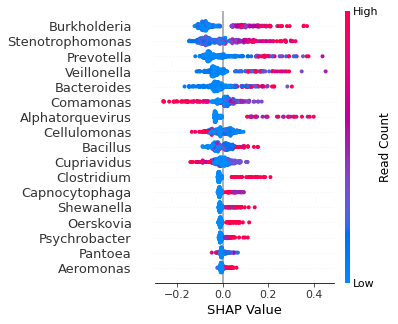

In [16]:
# Get SHAP summary before removing Cellulomonas and Agrobacterium
pre_model = XGBClassifier(**raw_params)
pre_model.fit(X=raw_CR, y=y)

pre_explainer = shap.TreeExplainer(pre_model, feature_pertubation='interventional', model_output='probability', data=raw_CR)
shap_pre = pre_explainer.shap_values(raw_CR)

shap.summary_plot(shap_pre, raw_CR, show=False, plot_size=(4, 5), color_bar_label='Read Count', max_display=25)
fig, ax = plt.gcf(), plt.gca()
ax.set_xlabel('SHAP Value')
plt.savefig(results / 'pre_shap.png', dpi=600, format='png', bbox_inches='tight')


### Number of Features

In [17]:
print('Neat', X.shape)
print('CR', raw_CR.shape)

Neat (287, 559)
CR (287, 17)


## Optimise and evaluate decontaminated models

In [18]:
raw_CR_results, raw_CR_params = optimise_evaluate(raw_CR, y)
# raw_CR_params = {'subsample': 0.7631578947368421, 'scale_pos_weight': 1.4273504273504274, 'n_estimators': 426, 'max_depth': 1, 'gamma': 0.0, 'colsample_bytree': 0.1}

RA_CR_results, RA_CR_params = optimise_evaluate(RA_CR, y)
# RA_CR_params = {'subsample': 0.38421052631578945, 'scale_pos_weight': 1.4273504273504274, 'n_estimators': 101, 'max_depth': 5, 'gamma': 2.894736842105263, 'colsample_bytree': 0.19473684210526315}

metric_df = metric_df.append(pd.DataFrame({'Raw CR': raw_CR_results, 'RA CR': RA_CR_results}).round(3).T)
display(metric_df)

,test_precision,test_recall,test_F1,test_AUROC
Without Confirmed,0.919,0.829,0.863,0.966
Without Confirmed (RA),0.930,0.845,0.876,0.971
Only Confirmed,0.905,0.811,0.851,0.921
Only Confirmed (RA),0.876,0.862,0.863,0.955
Simple Decontam without Confirmed,0.763,0.711,0.732,0.866
Simple Decontam without Confirmed (RA),0.839,0.745,0.777,0.894
Raw CR,0.768,0.735,0.748,0.875
RA CR,0.776,0.734,0.750,0.875


### Fit clean models

In [19]:
raw_CR_model = XGBClassifier(**raw_CR_params)
raw_CR_model.fit(raw_CR, y)

RA_CR_model = XGBClassifier(**RA_CR_params)
RA_CR_model.fit(RA_CR, y)

XGBClassifier(colsample_bytree=0.9526315789473684, gamma=1.0666666666666667,
              max_depth=9, n_estimators=140, scale_pos_weight=1.452991452991453,
              subsample=0.6)

## Interpreting model using SHAP values

### Plot of SHAP values per Feature

In [20]:
import matplotlib.pyplot as plt
explainer_CR = shap.TreeExplainer(raw_CR_model, feature_pertubation='interventional', model_output='probability', data=raw_CR)
shap_CR = explainer_CR.shap_values(raw_CR)

explainer_raw = shap.TreeExplainer(raw_model, feature_pertubation='interventional', model_output='probability', data=X)
shap_raw = explainer_raw.shap_values(X)

#### Dirty raw

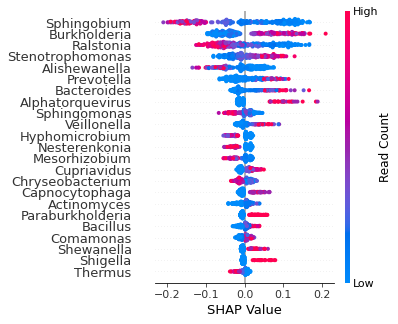

In [21]:
shap.summary_plot(shap_raw, X, show=False, plot_size=(4, 5), color_bar_label='Read Count', max_display=23)
fig, ax = plt.gcf(), plt.gca()
ax.set_xlabel('SHAP Value')
plt.savefig(results / 'raw_shap.png', dpi=600, format='png', bbox_inches='tight')

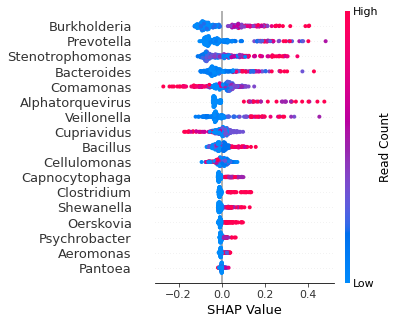

In [22]:
shap.summary_plot(shap_CR, raw_CR, show=False, plot_size=(4, 5), color_bar_label='Read Count', max_display=35)
fig, ax = plt.gcf(), plt.gca()
ax.set_xlabel('SHAP Value')
plt.savefig(results / 'raw_CR_shap.png', dpi=600, format='png', bbox_inches='tight')

### Force plot for healthy patient

Actual Classification 0
23


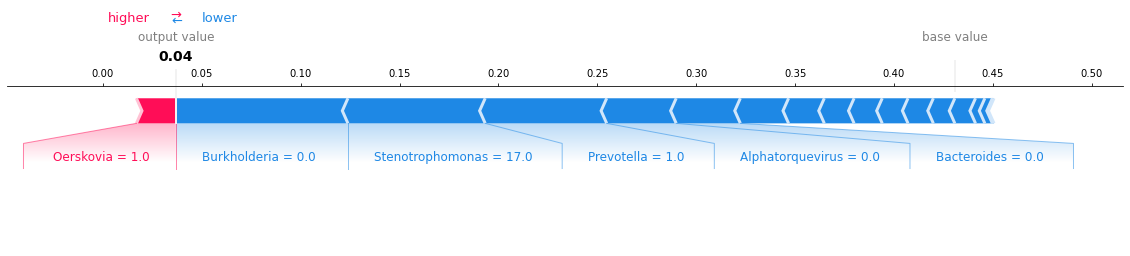

In [23]:
j = 23

print(f'Actual Classification {y[j]}')
print(raw_CR.index[j])

shap.force_plot(explainer_CR.expected_value, 
                shap_CR[j,:], 
                raw_CR.iloc[j,:],
                show=False,
                matplotlib=True)

plt.savefig(results / 'CR_force_plot.png', dpi=600, format='png', bbox_inches='tight')

### Final Results

In [24]:
display(metric_df)

metric_df.to_csv(results / 'karius_drop_confirmed_features_results.csv', index=True, header=True)

,test_precision,test_recall,test_F1,test_AUROC
Without Confirmed,0.919,0.829,0.863,0.966
Without Confirmed (RA),0.930,0.845,0.876,0.971
Only Confirmed,0.905,0.811,0.851,0.921
Only Confirmed (RA),0.876,0.862,0.863,0.955
Simple Decontam without Confirmed,0.763,0.711,0.732,0.866
Simple Decontam without Confirmed (RA),0.839,0.745,0.777,0.894
Raw CR,0.768,0.735,0.748,0.875
RA CR,0.776,0.734,0.750,0.875


In [25]:
from sklearn.metrics import roc_auc_score
from sklearn.utils import resample
n_boot = 1000

raw_aurocs = pd.DataFrame()
simple_aurocs = pd.DataFrame()
    
for i in range(n_boot):
    print(f'\riteration {i}', end='')
    X_boot, y_boot = resample(raw_CR, y, stratify=y)
    aucs = X_boot.apply(axis=0, func=lambda x: roc_auc_score(y_score=x, y_true=y_boot))
    
    raw_aurocs = raw_aurocs.append(aucs, ignore_index=True)
    
for i in range(n_boot):
    print(f'\riteration {i}', end='')
    X_boot, y_boot = resample(X_simple, y, stratify=y)
    aucs = X_boot.apply(axis=0, func=lambda x: roc_auc_score(y_score=x, y_true=y_boot))

    simple_aurocs = simple_aurocs.append(aucs, ignore_index=True)

display(raw_aurocs)
display(simple_aurocs)
    
raw_aurocs.to_csv(results / 'raw_CR_no_confirmed_AUROCS.csv', index=False, header=True)
simple_aurocs.to_csv(results / 'simple_decontam_no_confirmed_AUROCS.csv', index=False, header=True)

iteration 999

,Aeromonas,Alphatorquevirus,Bacillus,Bacteroides,Burkholderia,Capnocytophaga,Cellulomonas,Clostridium,Comamonas,Cupriavidus,Oerskovia,Pantoea,Prevotella,Psychrobacter,Shewanella,Stenotrophomonas,Veillonella
0,0.608472,0.600126,0.555807,0.614907,0.720161,0.594721,0.570362,0.538638,0.543338,0.547989,0.522549,0.590749,0.710910,0.557114,0.603067,0.671795,0.639417
1,0.523655,0.591378,0.567597,0.656838,0.692358,0.651659,0.589744,0.577024,0.579537,0.576018,0.551559,0.494193,0.686149,0.575088,0.596305,0.621669,0.619658
2,0.580392,0.616516,0.551056,0.604022,0.687255,0.599723,0.576546,0.578507,0.546430,0.597461,0.542685,0.584565,0.726823,0.548391,0.555782,0.668125,0.666315
3,0.636325,0.611413,0.689417,0.654776,0.723932,0.600377,0.628356,0.610131,0.648265,0.623529,0.577225,0.578683,0.718653,0.621493,0.611589,0.738260,0.626571
4,0.590196,0.628205,0.592936,0.690246,0.697863,0.612041,0.623555,0.561312,0.612745,0.530669,0.555178,0.587255,0.716541,0.575339,0.545123,0.674887,0.656762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.584012,0.564957,0.573328,0.632529,0.702640,0.606812,0.548718,0.557089,0.574384,0.563198,0.526219,0.575088,0.706410,0.541428,0.590724,0.699020,0.609226
996,0.588713,0.584037,0.613927,0.679311,0.734339,0.592584,0.562996,0.545148,0.567044,0.570211,0.556285,0.555933,0.748869,0.564605,0.556787,0.746958,0.655757
997,0.594796,0.599447,0.661011,0.550704,0.713751,0.613876,0.617094,0.594193,0.613072,0.570739,0.556888,0.526169,0.748793,0.567999,0.638210,0.749296,0.655882
998,0.543062,0.610633,0.625691,0.623379,0.676596,0.582604,0.575691,0.601760,0.646631,0.540196,0.539920,0.559351,0.701357,0.548014,0.553846,0.685093,0.644042


,Actinomadura,Actinomyces,Aeromonas,Aggregatibacter,Agrobacterium,Alistipes,Amycolatopsis,Anaerococcus,Aureimonas,Azospirillum,...,Rothia,Shewanella,Stenotrophomonas,Sutterella,Tyzzerella,Veillonella,Vibrio,Weissella,Williamsia,Yersinia
0,0.478934,0.528934,0.585797,0.494947,0.579487,0.508371,0.493565,0.486677,0.480191,0.485445,...,0.511740,0.561262,0.672976,0.517396,0.571393,0.617320,0.453570,0.504022,0.475189,0.529663
1,0.474811,0.503544,0.560633,0.505455,0.543917,0.535596,0.502112,0.479537,0.513575,0.502112,...,0.515184,0.569030,0.692232,0.510407,0.529537,0.559075,0.485797,0.499899,0.484465,0.529814
2,0.496204,0.577652,0.545928,0.485923,0.464052,0.499598,0.508270,0.466239,0.487733,0.487682,...,0.614253,0.598617,0.639417,0.506159,0.562846,0.649975,0.488487,0.501307,0.461740,0.528356
3,0.475943,0.555505,0.561740,0.554123,0.524887,0.552212,0.493565,0.457391,0.465510,0.455028,...,0.569884,0.573831,0.667119,0.509050,0.546104,0.666164,0.487129,0.500955,0.472624,0.510860
4,0.491704,0.621468,0.532428,0.494746,0.519683,0.559930,0.510935,0.454676,0.487934,0.479085,...,0.607215,0.562117,0.658095,0.481574,0.566466,0.653846,0.483635,0.518527,0.452262,0.532831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.490799,0.563399,0.578255,0.518477,0.513700,0.506838,0.497285,0.454248,0.455606,0.483132,...,0.563927,0.642484,0.701785,0.516566,0.548416,0.635420,0.477325,0.509854,0.489668,0.536199
996,0.496732,0.642961,0.615862,0.524057,0.545777,0.542986,0.505053,0.477728,0.470312,0.493565,...,0.574359,0.581624,0.717647,0.490045,0.584791,0.666742,0.482278,0.515334,0.466365,0.561086
997,0.509603,0.586199,0.547059,0.517974,0.571292,0.526295,0.506109,0.503369,0.479135,0.505882,...,0.550905,0.591227,0.736048,0.511388,0.545375,0.605103,0.497386,0.488436,0.471368,0.559930
998,0.504600,0.622574,0.555178,0.503620,0.580191,0.552991,0.487959,0.494118,0.477627,0.480392,...,0.594243,0.604299,0.693539,0.526395,0.528155,0.680845,0.487682,0.493967,0.442836,0.551332
